In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [2]:
def Equilibriosin(Equi,Efterma,L,mu,T,kb):
    contador=0 #tiene q volver a cero cuando cambio de potencial
    recuMS=0 #tiene q volver a cero cuando cambio de pontencial
    for i in range (Equi):  
        for j in range (L*L): #montecarlo
            L = Efterma.shape[0] 
            M = L*L 
    
            x = np.random.randint(0,L)
            y = np.random.randint(0,L)
            if Efterma[x,y] == 1: #intento desorber
                p = np.random.uniform(0,1)
                Pdes = np.exp(-mu/kb*T)              
                if p < (Pdes):
                    Efterma[x,y]=0
                
 
            else: #intento adsorber
                p = np.random.uniform(0,1)
                Pads = np.exp(mu/kb*T)
                if p < (Pads):
                    Efterma[x,y] = 1
                    
        E_equi=Efterma        
        N = np.count_nonzero(E_equi) #numero de particulas adsorbidas por cada i
        recuM=N/M #cubrimiento en cada vez q hago montecarlo o sea cada i
        
        if recuM != 0: #si es distinto de cero junta el recuM en recuMS y suma un contador
            recuMS =+ recuM
            contador =+ 1
        else: 
            contador = 1 #si no adsorbe nada pongo contador 1 para q no tire error, de todas maneras
                         #recuMS va a ser cero todavía, entonces recuP va a ser cero
    
    
    recuP=recuMS/contador #hago el promedio de todos los recubrimientos por cada montecarlo
    return recuP,E_equi

In [3]:
def Equilibriocon(Equi,Efterma,L,mu,T,kb):
    contador=0 #tiene q volver a cero cuando cambio de potencial
    recuMS=0 #tiene q volver a cero cuando cambio de pontencial
    for i in range (Equi):  
        for j in range (L*L): #montecarlo
            L = Efterma.shape[0] 
            M = L*L 
    
            x = np.random.randint(0,L)
            y = np.random.randint(0,L)
            Epriv = epsi*(Efterma[(x-1),y]+Efterma[x,(y-1)]+Efterma[(x+1)%L,y]+Efterma[x,(y+1)%L])
            if Efterma[x,y] == 1: #intento desorber
                p = np.random.uniform(0,1)
                Pdes = np.exp(-mu+Epriv/kb*T)              
                if p < (Pdes):
                    Efterma[x,y]=0
                
 
            else: #intento adsorber
                p = np.random.uniform(0,1)
                Pads = np.exp(mu-Epriv/kb*T)
                if p < (Pads):
                    Efterma[x,y] = 1
                    
        E_equi=Efterma        
        N = np.count_nonzero(E_equi) #numero de particulas adsorbidas por cada i
        recuM=N/M #cubrimiento en cada vez q hago montecarlo o sea cada i
        
        if recuM != 0: #si es distinto de cero junta el recuM en recuMS y suma un contador
            recuMS =+ recuM
            contador =+ 1
        else: 
            contador = 1 #si no adsorbe nada pongo contador 1 para q no tire error, de todas maneras
                         #recuMS va a ser cero todavía, entonces recuP va a ser cero
    
    
    recuP=recuMS/contador #hago el promedio de todos los recubrimientos por cada montecarlo
    return recuP,E_equi

In [4]:
def Equilibriodime(Equi,Efterma,L,mu,T,kb):
    contador=0 #tiene q volver a cero cuando cambio de potencial
    recuMS=0 #tiene q volver a cero cuando cambio de pontencial
    for i in range (Equi):  
        for j in range (L*L): #montecarlo
            L = Efterma.shape[0] 
            M = L*L 
            dire=np.random.randint(0,2)#0 vertical arriba, 1 horizontal izquierda
            
            
            if dire == 0: #vertical arriba
    
                x = np.random.randint(0,L)
                y = np.random.randint(0,L)
                if (Efterma[x,y] and Efterma[x-1,y]) == 1: #intento des
                    p = np.random.uniform(0,1)
                    Pdes = np.exp(-mu/kb*T)              
                    if p < (Pdes):
                        Efterma[x,y] = 0
                        Efterma[x-1,y] = 0
                
 
                elif (Efterma[x,y] and Efterma[x-1,y]) == 0: #intento ads
                    p = np.random.uniform(0,1)
                    Pads = np.exp(mu/kb*T)
                    if p < (Pads):
                        Efterma[x,y] = 1
                        Efterma[x-1,y] = 1
                
                 
                        
  
                
            else: #dire == 1: #horizontal izquierda
                
                x = np.random.randint(0,L)
                y = np.random.randint(0,L)
                if (Efterma[x,y] and Efterma[x,y-1]) == 1: #intento desorber
                    p = np.random.uniform(0,1)
                    Pdes = np.exp(-mu/kb*T)              
                    if p < (Pdes):
                        Efterma[x,y] = 0
                        Efterma[x,y-1] = 0
                
 
                elif (Efterma[x,y] and Efterma[x,y-1]) == 0: #intento ads
                    p = np.random.uniform(0,1)
                    Pads = np.exp(mu/kb*T)
                    if p < (Pads):
                        Efterma[x,y] = 1
                        Efterma[x,y-1] = 1
            
            
                    
        E_equi=Efterma
               
        N = np.count_nonzero(E_equi) #numero de particulas adsorbidas por cada i
        recuM=N/M #cubrimiento en cada vez q hago montecarlo o sea cada i
        
        if recuM != 0: #si es distinto de cero junta el recuM en recuMS y suma un contador
            recuMS =+ recuM
            contador =+ 1
        else: 
            contador = 1 #si no adsorbe nada pongo contador 1 para q no tire error, de todas maneras
                         #recuMS va a ser cero todavía, entonces recuP va a ser cero
    
    
    recuP=recuMS/contador #hago el promedio de todos los recubrimientos por cada montecarlo
    return recuP,E_equi

In [5]:
L = 20 #tamaño de la malla LxL
mui = -5
muf = 10
dmu = 1
Terma = 1
Equi = 1000
T=1
kb=1

Potenciales=[]
potenciales=np.linspace(-5, 10, 31)

Ei1 = np.random.randint(0,1,size=[L,L])
Recubrimiento_sin=[]
for mu in potenciales:
    recuP_sin,E_equi_sin=Equilibriosin(Equi,Ei1,L,mu,T,kb)
    Ei1=E_equi_sin

    Potenciales.append(mu)
    Recubrimiento_sin.append(recuP_sin)

Ei2 = np.random.randint(0,1,size=[L,L])
Recubrimientoatrac=[]
epsi=-0.7
for mu in potenciales:
    recuP_conA,E_equi_conA=Equilibriocon(Equi,Ei2,L,mu,T,kb)
    Ei2=E_equi_conA

    
    
   
    Recubrimientoatrac.append(recuP_conA)

Ei3 = np.random.randint(0,1,size=[L,L])
Recubrimientorepul=[]
epsi=0.7    
for mu in potenciales:
    recuP_conR,E_equi_conR=Equilibriocon(Equi,Ei2,L,mu,T,kb)
    Ei2=E_equi_conR
    
    
    
    Recubrimientorepul.append(recuP_conR)

Recubrimientodime=[]
Ei4 = np.random.randint(0,1,size=[L,L]) 
for mu in potenciales:
    recuP_dime,E_equi_dime=Equilibriodime(Equi,Ei3,L,mu,T,kb)
    Ei4=E_equi_dime


    Recubrimientodime.append(recuP_dime)

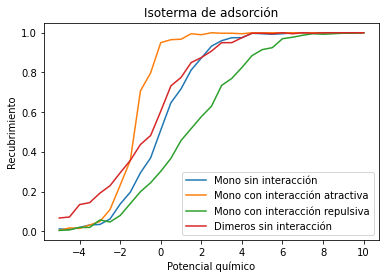

In [6]:
plt.plot(Potenciales,Recubrimiento_sin, label='Mono sin interacción')
plt.plot(Potenciales,Recubrimientoatrac, label='Mono con interacción atractiva')
plt.plot(Potenciales,Recubrimientorepul, label='Mono con interacción repulsiva')
plt.plot(Potenciales,Recubrimientodime, label='Dimeros sin interacción')
plt.title('Isoterma de adsorción')
plt.ylabel('Recubrimiento')
plt.xlabel('Potencial químico')
plt.legend()
plt.show()

In [7]:
Recubrimientodime


[0.0675,
 0.0725,
 0.135,
 0.145,
 0.1925,
 0.23,
 0.295,
 0.3575,
 0.4375,
 0.4825,
 0.605,
 0.7325,
 0.775,
 0.85,
 0.875,
 0.9075,
 0.95,
 0.95,
 0.975,
 0.9975,
 0.9975,
 0.995,
 1.0,
 0.995,
 1.0,
 0.9975,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]